## 1) Chargementdes données

In [103]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
from IPython.display import display
import matplotlib as plt

In [2]:
Analyses_df = pd.read_csv('data/naiades_export/Analyses.CSV', sep=';', header=0)
ConditionsEnvironnementales_df = pd.read_csv('data/naiades_export/ConditionsEnvironnementales.CSV', sep=';', header=0)
Operations_df = pd.read_csv('data/naiades_export/Operations.CSV', sep=';', header=0)
Stations_df = pd.read_csv('data/naiades_export/Stations.CSV', sep=';', header=0)

/tmp/ipykernel_33898/3757882307.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  Analyses_df = pd.read_csv('data/naiades_export/Analyses.CSV', sep=';', header=0)


## 2) Compréhension et vérification des données

### Exploration de la composition des fichiers

In [3]:
#column names and types

def print_df_info(df):
    print("dataset dimensions: ", df.shape, "\n")
    print("dataset columns: ", "\n",df.columns, "\n")
    print("dataset column types: ", "\n",df.dtypes,"\n")


In [4]:
#categorical columns and their values

def print_cat_cols(df):
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    cat_cols_dict = {col: i for i, col in enumerate(cat_cols)}


    for col in cat_cols:
        # store the different values for each category in a list
        cat_vals_list = []
        for col in cat_cols:
            cat_vals_list.append(df[col].unique().tolist())


    print("Dataset columns that are categories: ", "\n", cat_cols, "\n")
    for col, index in cat_cols_dict.items():
        print(f"Unique values for {col}: {cat_vals_list[index]}")

In [5]:
#number of unique values
def print_unique_vals_cat_cols(df):
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    df[cat_cols].nunique()

In [6]:
def print_num_cols(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print("Dataset columns that are numerical: ", "\n", num_cols, "\n")


In [7]:
# number of unique values
def print_nb_unique_vals_num_cols(df):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(df[num_cols].nunique())

In [8]:
def print_nb_unique_vals_cat_cols(df):
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    print(df[cat_cols].nunique())

In [9]:
def explore_df(df):
    print_df_info(df)
    print_cat_cols(df)
    print_unique_vals_cat_cols(df)
    print_nb_unique_vals_cat_cols(df)
    print_num_cols(df)
    print_nb_unique_vals_num_cols(df)

#### Dataset Analyses

In [10]:
explore_df(Analyses_df)

dataset dimensions:  (359564, 51) 

dataset columns:  
 Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'CdSupport',
       'LbSupport', 'CdFractionAnalysee', 'LbFractionAnalysee',
       'CdPrelevement', 'DatePrel', 'HeurePrel', 'DateAna', 'HeureAna',
       'CdParametre', 'LbLongParamètre', 'RsAna', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqAna', 'MnemoRqAna', 'CdInsituAna', 'LbInsituAna',
       'ProfondeurPrel', 'CdDifficulteAna', 'MnemoDifficulteAna', 'LdAna',
       'LqAna', 'LsAna', 'IncertAna', 'CdMetFractionnement',
       'NomMetFractionnement', 'CdMethode', 'NomMethode', 'RdtExtraction',
       'CdMethodeExtraction', 'NomMethodeExtraction', 'CdAccreAna',
       'MnemoAccredAna', 'AgreAna', 'CdStatutAna', 'MnemoStatutAna',
       'CdQualAna', 'LbQualAna', 'CommentairesAna', 'ComResultatAna', 'CdRdd',
       'NomRdd', 'CdProducteur', 'NomProducteur', 'CdPreleveur',
       'NomPreleveur', 'CdLaboratoire', 'NomLaboratoire'],
      dtype='object') 

datase

Dataset columns that are categories:  
 ['LbStationMesureEauxSurface', 'LbSupport', 'LbFractionAnalysee', 'DatePrel', 'HeurePrel', 'DateAna', 'HeureAna', 'LbLongParamètre', 'SymUniteMesure', 'MnemoRqAna', 'LbInsituAna', 'MnemoDifficulteAna', 'NomMetFractionnement', 'NomMethode', 'NomMethodeExtraction', 'MnemoAccredAna', 'MnemoStatutAna', 'LbQualAna', 'CommentairesAna', 'ComResultatAna', 'CdRdd', 'NomRdd', 'NomProducteur', 'NomPreleveur', 'NomLaboratoire'] 

Unique values for LbStationMesureEauxSurface: ['LE MUHLBACH DE SCHOENAU À SCHOENAU', 'LE RHIN À RHINAU', 'LE MUHLBACH DE DAUBENSAND À OBENHEIM', 'LA LACHTER À BOOFZHEIM', 'LE RHIN À GAMBSHEIM', 'LE CANAL DU RHONE AU RHIN À MACKENHEIM', "L'ISCHERT À SUNDHOUSE", 'LE MÜHLBACH DE GERSTHEIM (= LACHTER) À GERSTHEIM', 'LE HORGIESSEN À SÉLESTAT (AVAL)', 'LE FORSTLACH À SELESTAT (ILLWALD)', 'LE KRUMMLACH À SELESTAT (ILLWALD)', "L'ILL À BALDENHEIM (RATHSAMHAUSEN LE HAUT)", 'LA BLIND À BALDENHEIM', 'LE GIESSEN À THANVILLE', 'LA LIEPVRETTE À HU

### Exploration de détails

In [11]:
print("unique values CdRqAna", Analyses_df['CdRqAna'].unique())
print(Analyses_df.groupby('CdRqAna')['CdRqAna'].count())

unique values CdRqAna [ 1 10]
CdRqAna
1     127569
10    231995
Name: CdRqAna, dtype: int64


In [12]:
print(Analyses_df.groupby('LbQualAna')['LbQualAna'].count())

LbQualAna
Correcte      359559
Incertaine         5
Name: LbQualAna, dtype: int64


On va enlever les mesures "incertaines"

In [13]:
print("Number of non-null values in CommentairesAna column:", Analyses_df['CommentairesAna'].count())
print("Number of null values in CommentairesAna column:", Analyses_df['CommentairesAna'].isna().sum())

print("\n")

print("Number of non-null values in ComResultatAna column:", Analyses_df['ComResultatAna'].count())
print("Number of null values in ComResultatAna column:", Analyses_df['ComResultatAna'].isna().sum())


Number of non-null values in CommentairesAna column: 7161
Number of null values in CommentairesAna column: 352403


Number of non-null values in ComResultatAna column: 7161
Number of null values in ComResultatAna column: 352403


On va enlever les mesures "avec des commentaires" puis supprimer les colonnes

on va supprimer les colonnes 
, CdRdd, NomRdd, CdProducteur, NomProducteur, CdPreleveur, NomPreleveur, CdLaboratoire, NomLaboratoire

In [14]:
print(Analyses_df[['DatePrel', 'HeurePrel']].head(2))

     DatePrel HeurePrel
0  2016-11-28  10:05:00
1  2016-11-28  10:05:00


In [15]:
Analyses_df.groupby('LbLongParamètre')['RsAna'].describe()

,count,mean,std,min,25%,50%,75%,max
LbLongParamètre,,,,,,,,
(m+p)-chloroaniline,64.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"1,2,3,4,6,7,8-HpCDD",19.0,0.046547,0.054099,0.004448,0.012569,0.023253,0.052956,0.204339
"1,2,3,4,6,7,8-HpCDF",19.0,0.013022,0.014762,0.002261,0.003522,0.008260,0.015049,0.054705
"1,2,3,4,7,8,9-HpCDF",19.0,0.001252,0.001331,0.000500,0.000500,0.000673,0.001191,0.005128
"1,2,3,4,7,8-HxCDD",19.0,0.000977,0.000827,0.000500,0.000500,0.000511,0.000984,0.003134
...,...,...,...,...,...,...,...,...
thiametoxam,342.0,0.005061,0.000780,0.005000,0.005000,0.005000,0.005000,0.017000
trans Chlordane,504.0,7.345903,26.105879,0.005000,0.005000,0.005000,0.005000,100.000000
"trans-1,3-dichloropropène",230.0,0.100000,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000


#### Dataset ConditionsEnvironnementales

In [16]:
explore_df(ConditionsEnvironnementales_df)

dataset dimensions:  (26791, 23) 

dataset columns:  
 Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'DatePrel',
       'CdParametreEnv', 'LbLongParamètre', 'RsParEnv', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqParEn', 'MnemoRqParEn', 'CdStatutParEn',
       'MnemoStatutAna', 'CdQualParEnv', 'LbQualParEnv', 'ComParEnv',
       'DateParEnv', 'HeureParEnv', 'CdMethodeParEnv', 'NomMethodeParEnv',
       'CdProducteur', 'NomProducteur', 'CdPreleveur', 'NomPreleveur'],
      dtype='object') 

dataset column types:  
 CdStationMesureEauxSurface      int64
LbStationMesureEauxSurface     object
DatePrel                       object
CdParametreEnv                  int64
LbLongParamètre                object
RsParEnv                       object
CdUniteMesure                  object
SymUniteMesure                 object
CdRqParEn                       int64
MnemoRqParEn                   object
CdStatutParEn                   int64
MnemoStatutAna                 object


#### Dataset Operations

In [17]:
explore_df(Operations_df)

dataset dimensions:  (71227, 32) 

dataset columns:  
 Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'CdPrelevement', 'CoordXPrel', 'CoordYPrel', 'ProjectPrel',
       'LibelléProjection', 'CdSupport', 'LbSupport', 'CdMethode',
       'NomLongMethodePrel', 'DatePrel', 'HeurePrel', 'DateFinPrel',
       'HeureFinPrel', 'CdZoneVerticaleProspectee',
       'MnémoZoneVerticaleProspectée', 'ProfondeurPrel', 'CdDifficultePrel',
       'MnemoDifficultePrel', 'CdAccredPrel', 'MnemoAccredPrel', 'AgrePrel',
       'CdFinalitePrel', 'LbFinalitePrel', 'CommentairesPrel', 'CdRdd',
       'NomRdd', 'CdProducteurPrelevement', 'NomProducteurPrelevement',
       'CdPreleveur', 'NomPreleveur'],
      dtype='object') 

dataset column types:  
 CdStationMesureEauxSurface        int64
LbStationMesureEauxSurface       object
CdPrelevement                     int64
CoordXPrel                        int64
CoordYPrel                        int64
ProjectPrel                       int

#### Dataset Stations

In [18]:
explore_df(Stations_df)

dataset dimensions:  (148, 39) 

dataset columns:  
 Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'DurStationMesureEauxSurface', 'CoordXStationMesureEauxSurface',
       'CoordYStationMesureEauxSurface', 'CdProjStationMesureEauxSurface',
       'LibelleProjection', 'CodeCommune', 'LbCommune', 'CodeDepartement',
       'LbDepartement', 'CodeRegion', 'LbRegion', 'CdMasseDEau',
       'CdEuMasseDEau', 'NomMasseDEau', 'CdEuSsBassinDCEAdmin',
       'NomSsBassinDCEAdmin', 'CdBassinDCE', 'CdEuBassinDCE', 'NomEuBassinDCE',
       'CdTronconHydrographique', 'CdCoursdEau', 'NomCoursdEau',
       'CodeTypEthStationMesureEauxSurface',
       'LibelleTypEthStationMesureEauxSurface', 'ComStationMesureEauxSurface',
       'DateCreationStationMesureEauxSurface',
       'DateArretActiviteStationMesureEauxSurface',
       'DateMAJInfosStationMesureEauxSurface',
       'FinaliteStationMesureEauxSurface',
       'LocPreciseStationMesureEauxSurface',
       'CodeNatureStationM

### Verification de la cohérence des unités de mesures

In [95]:
#A revoir

#In Analyses_df, verify that eachline with the same value in "LbLongParamètre", in "LbSupport" and LbFractionAnalysee has the same value in "SymUniteMesure"

#return False if there is at least one line with the same value in "LbLongParamètre", in "LbSupport" and LbFractionAnalysee and different value in "SymUniteMesure"
def same_unit_or_not(df):
    df = df.groupby(['LbLongParamètre', 'LbSupport', 'LbFractionAnalysee']).agg({'SymUniteMesure': 'nunique'}).reset_index()
    df = df[df['SymUniteMesure'] > 1]
    if df.empty:
        return True
    else:
        return False
    
same_unit_or_not(Analyses_df)

True

On a bien la même unité de mesure pour toutes les analyses du même paramêtre, aillant le même support, la même fraction

### Traitement des mesures sous le seuil de quantification

en première approche, on les mettra à 0

In [20]:
# create a copy of Analyses_df
Analyses_df_worked = Analyses_df.copy()

# replace every value of "RsAna" with 0 where MnemoRqParEn= "Résultat < au seuil de quantification"
Analyses_df_worked.loc[Analyses_df_worked['MnemoRqAna'] == "Résultat < au seuil de quantification", 'RsAna'] = 0



## 3) Statistiques elementaires

In [21]:
#numerical columns and their values
def analyse_num_cols(df):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(df[num_cols].describe())

In [22]:
def print_fill_rate(df):
    fill_rate = df.isna().sum() / df.shape[0]
    print(fill_rate)

### Dataset Analyse

#### Traitement des mesures invalides

In [23]:
# Suppression des mesures incertainespuis on supprime la colonne
Analyses_df_worked = Analyses_df_worked[Analyses_df_worked['LbQualAna'] != 'incertaines']
Analyses_df_worked = Analyses_df_worked.drop(columns=['LbQualAna'])
Analyses_df_worked = Analyses_df_worked.drop(columns=['CdQualAna'])



# Suppression des lignes dont avec des commentaires (indiquant une mesure incorrecte), puis suppression de la colonne commentaire
Analyses_df_worked = Analyses_df_worked.dropna(subset=['CommentairesAna'])
Analyses_df_worked = Analyses_df_worked.dropna(subset=['ComResultatAna'])
Analyses_df_worked = Analyses_df_worked.drop(columns=['CommentairesAna', 'ComResultatAna'])

#### Traitement des colonnes inutiles

In [24]:
# On supprime les colonnes inutiles
Analyses_df_worked.drop(columns=['CdRdd', 'NomRdd', 'CdProducteur', 'NomProducteur', 'CdPreleveur', 'NomPreleveur', 'CdLaboratoire', 'NomLaboratoire'], inplace=True)


#### Traitement des NaN

In [25]:
print_fill_rate(Analyses_df_worked)
analyse_num_cols(Analyses_df_worked)

CdStationMesureEauxSurface    0.000000
LbStationMesureEauxSurface    0.000000
CdSupport                     0.000000
LbSupport                     0.000000
CdFractionAnalysee            0.000000
LbFractionAnalysee            0.000000
CdPrelevement                 0.000000
DatePrel                      0.000000
HeurePrel                     0.000000
DateAna                       0.000000
HeureAna                      0.000140
CdParametre                   0.000000
LbLongParamètre               0.000000
RsAna                         0.000000
CdUniteMesure                 0.000000
SymUniteMesure                0.000000
CdRqAna                       0.000000
MnemoRqAna                    0.000000
CdInsituAna                   0.000000
LbInsituAna                   0.000000
ProfondeurPrel                1.000000
CdDifficulteAna               0.000000
MnemoDifficulteAna            0.000000
LdAna                         0.012708
LqAna                         0.000000
LsAna                    

On enlève les colonnes inutiles qui ont trop de valeurs nan, puis les lignes où il en reste

In [26]:
Analyses_df_worked = Analyses_df_worked.drop(columns=['ProfondeurPrel', 'LdAna', 'LqAna', 'LsAna', 'IncertAna', 'CdMetFractionnement', 'NomMetFractionnement', 'RdtExtraction', 'CdMethodeExtraction', 'NomMethodeExtraction', 'AgreAna'])   
                                                    
#drop lines where there is a nan
Analyses_df_worked = Analyses_df_worked.dropna()

On enlève les colonnes restentes inutiles pour la classification

In [27]:
print("remaining columns", Analyses_df_worked.columns)



remaining columns Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'CdSupport',
       'LbSupport', 'CdFractionAnalysee', 'LbFractionAnalysee',
       'CdPrelevement', 'DatePrel', 'HeurePrel', 'DateAna', 'HeureAna',
       'CdParametre', 'LbLongParamètre', 'RsAna', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqAna', 'MnemoRqAna', 'CdInsituAna', 'LbInsituAna',
       'CdDifficulteAna', 'MnemoDifficulteAna', 'CdMethode', 'NomMethode',
       'CdAccreAna', 'MnemoAccredAna', 'CdStatutAna', 'MnemoStatutAna'],
      dtype='object')


In [28]:
Analyses_df_worked = Analyses_df_worked.drop(columns=['CdSupport', 'LbSupport', 'MnemoRqAna', 'CdAccreAna', 'MnemoAccredAna', 'CdDifficulteAna', 'MnemoDifficulteAna', 'CdStatutAna', 'MnemoStatutAna'])

In [29]:
analyse_num_cols(Analyses_df_worked)

       CdStationMesureEauxSurface  CdFractionAnalysee  CdPrelevement  \
count                7.160000e+03         7160.000000   7.160000e+03   
mean                 2.035304e+06           22.373743   6.072509e+06   
std                  2.396088e+04            5.844231   1.770840e+05   
min                  2.001046e+06            3.000000   4.548252e+06   
25%                  2.025500e+06           23.000000   6.001975e+06   
50%                  2.037400e+06           23.000000   6.132011e+06   
75%                  2.045050e+06           23.000000   6.151878e+06   
max                  2.098965e+06           32.000000   6.356382e+06   

       CdParametre        RsAna  CdUniteMesure      CdRqAna  CdInsituAna  \
count  7160.000000  7160.000000    7160.000000  7160.000000  7160.000000   
mean   3169.554888     7.293459     138.397486     8.773184     1.987570   
std    1750.193735    68.087057      20.856459     3.088300     0.110803   
min    1082.000000     0.000000      28.000000 

### dataset ConditionsEnvironnementales

In [30]:
print_fill_rate(ConditionsEnvironnementales_df)

CdStationMesureEauxSurface    0.000000
LbStationMesureEauxSurface    0.000000
DatePrel                      0.000000
CdParametreEnv                0.000000
LbLongParamètre               0.000000
RsParEnv                      0.000000
CdUniteMesure                 0.000000
SymUniteMesure                0.000000
CdRqParEn                     0.000000
MnemoRqParEn                  0.000000
CdStatutParEn                 0.000000
MnemoStatutAna                0.000000
CdQualParEnv                  0.000000
LbQualParEnv                  0.000000
ComParEnv                     0.968422
DateParEnv                    0.003434
HeureParEnv                   0.999963
CdMethodeParEnv               0.000000
NomMethodeParEnv              0.000000
CdProducteur                  0.002090
NomProducteur                 0.002090
CdPreleveur                   0.002090
NomPreleveur                  0.002090
dtype: float64


In [31]:
ConditionsEnvironnementales_df_worked = ConditionsEnvironnementales_df.copy()

#drop columns ComParEnv HeureParEnv
ConditionsEnvironnementales_df_worked = ConditionsEnvironnementales_df_worked.drop(columns=['ComParEnv', 'HeureParEnv'])

#drop lines with nan
ConditionsEnvironnementales_df_worked = ConditionsEnvironnementales_df_worked.dropna()

In [32]:
analyse_num_cols(ConditionsEnvironnementales_df_worked)

       CdStationMesureEauxSurface  CdParametreEnv     CdRqParEn  \
count                2.669900e+04    26699.000000  26699.000000   
mean                 2.039169e+06     1717.616690      1.023596   
std                  2.107508e+04     1077.119041      0.460238   
min                  2.001046e+06     1408.000000      1.000000   
25%                  2.029160e+06     1412.000000      1.000000   
50%                  2.040800e+06     1422.000000      1.000000   
75%                  2.044400e+06     1428.000000      1.000000   
max                  2.098965e+06     7343.000000     10.000000   

       CdStatutParEn  CdQualParEnv  CdMethodeParEnv  CdProducteur  \
count   26699.000000   26699.00000     26699.000000  2.669900e+04   
mean        1.019963       3.94011       228.294431  1.969826e+13   
std         0.139877       0.41963       167.385009  1.833496e+12   
min         1.000000       1.00000         0.000000  1.857030e+13   
25%         1.000000       4.00000         0.000000

### Dataset Operations

In [33]:
print_fill_rate(Operations_df)

CdStationMesureEauxSurface      0.000000
LbStationMesureEauxSurface      0.000000
CdPrelevement                   0.000000
CoordXPrel                      0.000000
CoordYPrel                      0.000000
ProjectPrel                     0.000000
LibelléProjection               0.000000
CdSupport                       0.000000
LbSupport                       0.000000
CdMethode                       0.000000
NomLongMethodePrel              0.000000
DatePrel                        0.000000
HeurePrel                       0.001179
DateFinPrel                     1.000000
HeureFinPrel                    1.000000
CdZoneVerticaleProspectee       1.000000
MnémoZoneVerticaleProspectée    1.000000
ProfondeurPrel                  1.000000
CdDifficultePrel                0.000000
MnemoDifficultePrel             0.000000
CdAccredPrel                    0.000000
MnemoAccredPrel                 0.000000
AgrePrel                        1.000000
CdFinalitePrel                  0.000000
LbFinalitePrel  

In [34]:
Operations_df_worked = Operations_df.copy()

#drop columns ,DateFinPrel, HeureFinPre, CdZoneVerti, MnémoZoneVe, ProfondeurPrel, AgrePrel, CommentairesPrel, CdPreleveur, NomPreleveur
Operations_df_worked = Operations_df_worked.drop(columns=['DateFinPrel', 'HeureFinPrel', 'CdZoneVerticaleProspectee', 'MnémoZoneVerticaleProspectée', 'ProfondeurPrel', 'AgrePrel', 'CommentairesPrel', 'CdPreleveur', 'NomPreleveur'])

#drop lines where there is a nan
Operations_df_worked = Operations_df_worked.dropna()

In [35]:
analyse_num_cols(Operations_df_worked)

       CdStationMesureEauxSurface  CdPrelevement    CoordXPrel    CoordYPrel  \
count                6.905000e+04   6.905000e+04  6.905000e+04  6.905000e+04   
mean                 2.040067e+06   6.097657e+06  1.045399e+06  6.866801e+06   
std                  8.488643e+03   2.651887e+05  1.852607e+04  2.477710e+04   
min                  2.001046e+06   4.548248e+06  9.938870e+05  6.797189e+06   
25%                  2.032800e+06   6.120457e+06  1.024256e+06  6.846056e+06   
50%                  2.041741e+06   6.140856e+06  1.041843e+06  6.875430e+06   
75%                  2.045250e+06   6.164924e+06  1.061222e+06  6.886808e+06   
max                  2.098965e+06   6.356382e+06  1.079074e+06  6.893714e+06   

       ProjectPrel     CdSupport     CdMethode  CdDifficultePrel  \
count      69050.0  69050.000000  69050.000000           69050.0   
mean          26.0      3.002042    290.912078               0.0   
std            0.0      0.078243      3.949641               0.0   
min    

### Dataset Stations

In [36]:
print_fill_rate(Stations_df)

CdStationMesureEauxSurface                   0.000000
LbStationMesureEauxSurface                   0.000000
DurStationMesureEauxSurface                  0.000000
CoordXStationMesureEauxSurface               0.000000
CoordYStationMesureEauxSurface               0.000000
CdProjStationMesureEauxSurface               0.000000
LibelleProjection                            0.000000
CodeCommune                                  0.000000
LbCommune                                    0.000000
CodeDepartement                              0.000000
LbDepartement                                0.000000
CodeRegion                                   0.000000
LbRegion                                     0.000000
CdMasseDEau                                  0.020270
CdEuMasseDEau                                0.020270
NomMasseDEau                                 0.020270
CdEuSsBassinDCEAdmin                         0.020270
NomSsBassinDCEAdmin                          0.020270
CdBassinDCE                 

40% de nan dans la colonne "SuperficieBassinVersantTopo", mais je la supprime pas, elle a l'air importante

In [37]:
Stations_df_worked = Stations_df.copy()

# drop column the columns ComStationMesureEauxSurface, DateArretActiviteStationMesureEauxSurface, FinaliteStationMesureEauxSurface, CodeNatureStationMesureEauxSurface, LibelleNatureStationMesureEauxSurface,PkPointTronconEntiteHydroPrincipale, PremierMoisAnneeEtiage, SuperficieBassinVersantReel
Stations_df_worked = Stations_df_worked.drop(columns=['ComStationMesureEauxSurface', 'DateArretActiviteStationMesureEauxSurface', 'FinaliteStationMesureEauxSurface', 'CodeNatureStationMesureEauxSurface', 'LibelleNatureStationMesureEauxSurface','PkPointTronconEntiteHydroPrincipale', 'PremierMoisAnneeEtiage', 'SuperficieBassinVersantReel'])

#drop lines where there is a nan
Stations_df_worked = Stations_df_worked.dropna()



In [38]:
analyse_num_cols(Operations_df_worked)

       CdStationMesureEauxSurface  CdPrelevement    CoordXPrel    CoordYPrel  \
count                6.905000e+04   6.905000e+04  6.905000e+04  6.905000e+04   
mean                 2.040067e+06   6.097657e+06  1.045399e+06  6.866801e+06   
std                  8.488643e+03   2.651887e+05  1.852607e+04  2.477710e+04   
min                  2.001046e+06   4.548248e+06  9.938870e+05  6.797189e+06   
25%                  2.032800e+06   6.120457e+06  1.024256e+06  6.846056e+06   
50%                  2.041741e+06   6.140856e+06  1.041843e+06  6.875430e+06   
75%                  2.045250e+06   6.164924e+06  1.061222e+06  6.886808e+06   
max                  2.098965e+06   6.356382e+06  1.079074e+06  6.893714e+06   

       ProjectPrel     CdSupport     CdMethode  CdDifficultePrel  \
count      69050.0  69050.000000  69050.000000           69050.0   
mean          26.0      3.002042    290.912078               0.0   
std            0.0      0.078243      3.949641               0.0   
min    

### Matrices de corrélations

Sur les colonnes 

In [39]:
print(Analyses_df_worked.columns)


Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'CdFractionAnalysee', 'LbFractionAnalysee', 'CdPrelevement', 'DatePrel',
       'HeurePrel', 'DateAna', 'HeureAna', 'CdParametre', 'LbLongParamètre',
       'RsAna', 'CdUniteMesure', 'SymUniteMesure', 'CdRqAna', 'CdInsituAna',
       'LbInsituAna', 'CdMethode', 'NomMethode'],
      dtype='object')


In [40]:
# Analyses_df_worked heatmap
corr_matrix = Analyses_df_worked.corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                x=corr_matrix.index.values,
                                y=corr_matrix.columns.values))
fig.update_layout(title='Analyses_df_worked heatmap')
fig.show()

# # ConditionsEnvironnementales_df_worked heatmap
# corr_matrix = ConditionsEnvironnementales_df_worked.corr()
# fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
#                                 x=corr_matrix.index.values,
#                                 y=corr_matrix.columns.values))
# fig.update_layout(title='ConditionsEnvironnementales_df_worked heatmap')
# fig.show()

# # Operations_df_worked heatmap
# corr_matrix = Operations_df_worked.corr()
# fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
#                                 x=corr_matrix.index.values,
#                                 y=corr_matrix.columns.values))
# fig.update_layout(title='Operations_df_worked heatmap')
# fig.show()


/tmp/ipykernel_33898/3194662689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Analyses_df_worked.corr()


In [41]:
# Create dictionaries to map the codes to labels
station_label_mapping = dict(zip(Analyses_df_worked['CdStationMesureEauxSurface'], Analyses_df_worked['LbStationMesureEauxSurface']))
fraction_label_mapping = dict(zip(Analyses_df_worked['CdFractionAnalysee'], Analyses_df_worked['LbFractionAnalysee']))

Sur les types de mesures

In [86]:
Analyses_df_worked_for_param_corr = Analyses_df_worked[['LbLongParamètre', 'RsAna', "DatePrel", "HeurePrel", "CdFractionAnalysee", "CdStationMesureEauxSurface"]].copy()

# Combine the DatePrel and HeurePrel into a single DateTime column for precise time tracking
Analyses_df_worked_for_param_corr['DateTime'] = pd.to_datetime(Analyses_df_worked_for_param_corr['DatePrel'] + ' ' + Analyses_df_worked_for_param_corr['HeurePrel'])

# Create a pivot table with DateTime, CdFractionAnalysee, and CdStationMesureEauxSurface as a multi-index
pivot_table = Analyses_df_worked_for_param_corr.pivot_table(index=['DateTime', 'CdFractionAnalysee', 'CdStationMesureEauxSurface'], columns='LbLongParamètre', values='RsAna')

# After creating the pivot table, sort by DateTime within each group to ensure chronological order
pivot_table.sort_index(level='DateTime', inplace=True)

# replace all NaN by 0
# pivot_table = pivot_table.fillna(0)

#drop pivot_table columns where there are only 0
pivot_table = pivot_table.loc[:, (pivot_table != 0).any(axis=0)]

#drop pivot_table columns where there are only NaN
pivot_table = pivot_table.dropna(axis=1, how='all')

Number of non-zero values in the Ammonium column: 1144
Number of 0 values in the Ammonium column: 2
Number of NaN values in the Ammonium column: 1097
The 'Ammonium' column exists in the pivot_table.


,,LbLongParamètre,"1,2,3,5-Tetrachlorobenzen","1,2-Dichlorethene","2,4-D","2,6-Dichlorobenzamide","2,6-Dimethylaniline",2-Chloro-3-nitrotoluene,2-Chloro-6-methylaniline,2-Naphtol,2-chloro-4-nitrotoluene,2.4+2.5 dichloroanilines,...,cis-Chlordane,dithianon,fenoxaprop-ethyl,fosetyl-aluminium,n-Butyl Phtalate,p-octyl phénol,p-sec-Amylphenol,p-tert-Amylphenol,para-tert-Octylphenol,propaquizafop
DateTime,CdFractionAnalysee,CdStationMesureEauxSurface,,,,,,,,,,,,,,,,,,,,,


AttributeError: module 'matplotlib' has no attribute 'show'

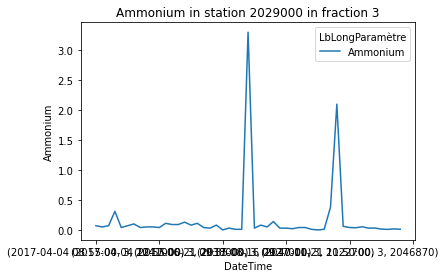

In [104]:
#Filter the pivot table to only include data for the "ANDLAU À FEGERSHEIM" station
pivot_table_filtered = pivot_table.loc[pivot_table.index.get_level_values('CdStationMesureEauxSurface') == '2029000']

# Display the first 5 rows of the filtered pivot table
#display(pivot_table.head(5))

# Count the number of non-zero values in the Ammonium column
num_nonzero_ammonium = (pivot_table['Ammonium'] != 0).sum()
print("Number of non-zero values in the Ammonium column:", num_nonzero_ammonium)

# Count the number of 0 values in the Ammonium column
num_zero_ammonium = (pivot_table['Ammonium'] == 0).sum()
print("Number of 0 values in the Ammonium column:", num_zero_ammonium)

num_nan_ammonium = pivot_table['Ammonium'].isna().sum()
print("Number of NaN values in the Ammonium column:", num_nan_ammonium)

if 'Ammonium' in pivot_table.columns:
    print("The 'Ammonium' column exists in the pivot_table.")
else:
    print("The 'Ammonium' column does not exist in the pivot_table.")


#Filter the pivot table to only include data for the specified station and fraction
pivot_table_filtered = pivot_table.loc[(pivot_table.index.get_level_values('CdStationMesureEauxSurface') == '2029000') & (pivot_table.index.get_level_values('CdFractionAnalysee') == 3)]

display(pivot_table_filtered.head(5))

# Filter the pivot table to only include data where Ammonium is not null
pivot_table_filtered_Amonium = pivot_table[pd.notnull(pivot_table['Ammonium'])]
pivot_table_filtered_Nitrates = pivot_table[pd.notnull(pivot_table['Nitrates'])]


# # Plot the Ammonium column against the DateTime index

# Plot the Ammonium column against the DateTime index
ax = pivot_table_filtered_Amonium[['Ammonium']].plot(title="Ammonium in station 2029000 in fraction 3")
ax.set_xlabel("DateTime")
ax.set_ylabel("Ammonium")
plt.show()

pivot_table_filtered_Nitrates[['Nitrates']].plot()


In [92]:
# Initialize a dictionary to hold correlation matrices for each unique combination of CdFractionAnalysee and CdStationMesureEauxSurface
grouped_correlation_matrices = {}

# Group by CdFractionAnalysee and CdStationMesureEauxSurface and calculate correlation for each group
for (fraction, station), group in pivot_table.groupby(level=['CdFractionAnalysee', 'CdStationMesureEauxSurface']):
    # Calculate the correlation matrix for the current group
    corr_matrix = group.corr(method='pearson')  # Can use 'spearman' for non-linear correlations

    # Exclude self-correlations and redundant correlations by only considering the upper triangle of the matrix
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Filter the correlation matrix to only include correlations above the threshold
    high_corr_pairs = corr_matrix.stack().where(lambda x: x.abs() > 0.90).dropna()

    # Store the high correlation pairs in the dictionary with the fraction and station as keys
    grouped_correlation_matrices[(fraction, station)] = high_corr_pairs

# When printing the results, use the mappings to replace codes with labels
for (fraction, station), high_corr_pairs in grouped_correlation_matrices.items():
    if not high_corr_pairs.empty:
        # Use the get method of the dictionary to avoid KeyErrors in case a code is not found
        station_label = station_label_mapping.get(station, "Unknown Station")
        fraction_label = fraction_label_mapping.get(fraction, "Unknown Fraction")
        print(f"\nHigh correlations at {station_label} in {fraction_label}:")
        print(high_corr_pairs)


High correlations at L'ANDLAU À FEGERSHEIM in Phase aqueuse de l'eau (filtrée, centrifugée...):
LbLongParamètre  LbLongParamètre
Ammonium         Nitrates           1.0
                 Nitrites          -1.0
Nitrates         Nitrites          -1.0
dtype: float64

High correlations at L'EHN À MEISTRATZHEIM in Eau brute:
LbLongParamètre        LbLongParamètre
2,6-Dichlorobenzamide  Bromacil           1.0
dtype: float64

High correlations at LA SOUFFEL À MUNDOLSHEIM in Eau brute:
LbLongParamètre    LbLongParamètre
Carbone Organique  Ibuprofene         1.0
Diméthénamide      Ethofumésate       1.0
                   Ibuprofene        -1.0
Ethofumésate       Ibuprofene        -1.0
dtype: float64

High correlations at LA MODER À AUENHEIM in Eau brute:
LbLongParamètre    LbLongParamètre
Carbone Organique  Ibuprofene        -1.0
Diméthénamide      Ethofumésate       1.0
dtype: float64

High correlations at L'EBERBACH À WALBOURG in Eau brute:
LbLongParamètre  LbLongParamètre
Diflufenicanil   